In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# https://github.com/LinkedInLearning/scikit-learn-machine-learning-2488551/blob/main/Exercices/04/04_02_ACP.ipynb

In [111]:
df = pd.read_csv(os.getcwd()+"\\Dataset_Clean.csv", index_col='Metrics')

In [112]:
year='2017'
data = df[df.Date == f'31/12/{year}']
data = data.drop('Date',axis=1)
data = data.transpose()

# Simplifier les intitulés des colonnes et lignes
data.columns = [n.replace(' (fma) as of 12/31/17', "") for n in data.columns]
data.columns = [n.replace(' (NTMA)', "") for n in data.columns]
data.columns = [n.replace(' NTMA', "") for n in data.columns]
data.index = [n.replace('S&P 500 / ', "") for n in data.index]
data.index = [n.replace('-SEC', "") for n in data.index]
data.index = [n.replace(' - SEC', "") for n in data.index]

In [113]:
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Application de l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

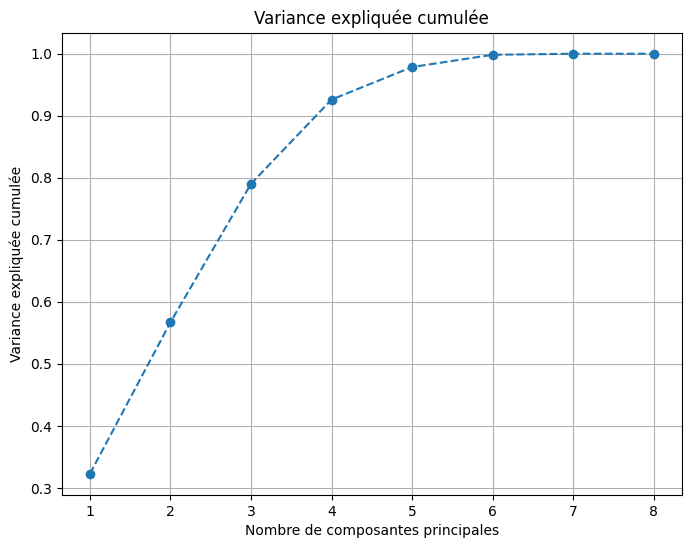

In [ ]:
# Visualisation de la variance expliquée
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.show()

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Conteneur d'affichage
output = widgets.Output()

# Fonction de mise à jour du graphique
def update_plot(*_):
    with output:
        clear_output(wait=True)
        pc_x, pc_y = pc_x_widget.value - 1, pc_y_widget.value - 1  # Ajuster les indices
        fig, ax = plt.subplots(figsize=(fig_size_widget.value, fig_size_widget.value))  # Taille ajustable
        
        # Ajouter les noms des points en restant dans les limites définies
        if show_point.value:
            sns.scatterplot(x=f'PC{pc_x+1}', y=f'PC{pc_y+1}', data=pca_df, s=30)
            for i, txt in enumerate(data.index):
                x, y = pca_df.iloc[i, pc_x], pca_df.iloc[i, pc_y]
                ax.text(x, y, txt, fontsize=9, ha='right')
        
        # Cercle unité
        ax.add_artist(plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False))
        
        # Flèches des variables
        correlations = pca.components_.T * np.sqrt(pca.explained_variance_)
        for i in range(correlations.shape[0]):
            x, y = correlations[i, pc_x], correlations[i, pc_y]
            plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.04, head_length=0.04)
            if show_vector_labels.value:
                plt.text(x, y, data.columns[i], fontsize=10, ha='center', va='center')
        
        # Ajustements visuels pour se focaliser sur [-axis_limit, axis_limit]
        ax.set_xlim(-axis_limit_widget.value, axis_limit_widget.value)
        ax.set_ylim(-axis_limit_widget.value, axis_limit_widget.value)
        ax.set_xlabel(f'PC{pc_x+1}')
        ax.set_ylabel(f'PC{pc_y+1}')
        ax.set_title('Cercle des corrélations (ACP)')
        ax.set_aspect('equal')  # Assurer un ratio 1:1 entre les axes
        plt.axhline(0, color='grey', linestyle='--')
        plt.axvline(0, color='grey', linestyle='--')
        plt.grid(False)
        plt.show()

# Widgets pour sélectionner les composantes principales
pc_x_widget = widgets.IntSlider(value=1, min=1, max=pca.n_components_, description='PC X:')
pc_y_widget = widgets.IntSlider(value=2, min=1, max=pca.n_components_, description='PC Y:')
show_point = widgets.Checkbox(value=True, description='Supplementary variables')
show_vector_labels = widgets.Checkbox(value=True, description='Vector labels')
fig_size_widget = widgets.IntSlider(value=10, min=8, max=14, description='Figure length')
axis_limit_widget = widgets.IntSlider(value=2, min=1, max=5, description='Axis limit')

# Liaison des widgets
for widget in (pc_x_widget, pc_y_widget, show_point, show_vector_labels, fig_size_widget, axis_limit_widget):
    widget.observe(update_plot, names='value')

# Affichage
display(widgets.VBox([pc_x_widget, pc_y_widget, show_point, show_vector_labels, fig_size_widget, axis_limit_widget]), output)
update_plot()


Output()